
# CSIP5103: Artificial Neural Networks & NLP
# Assignment: A Neural Network Model for Fashion-MNIST Image Classification


In [ ]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git


Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 762 (delta 0), reused 0 (delta 0), pack-reused 760 (from 2)
Receiving objects: 100% (762/762), 105.85 MiB | 34.43 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [ ]:
# Importing Libraries
import os
import gzip
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


def load_apparel_dataset_from_files(dataset_directory, data_split_type='train'):

    label_file_path = os.path.join(dataset_directory, f'{data_split_type}-labels-idx1-ubyte.gz')
    image_file_path = os.path.join(dataset_directory, f'{data_split_type}-images-idx3-ubyte.gz')

    # Load labels
    with gzip.open(label_file_path, 'rb') as label_file_stream:
        loaded_labels = np.frombuffer(label_file_stream.read(), dtype=np.uint8, offset=8)

    # Load images
    with gzip.open(image_file_path, 'rb') as image_file_stream:
        loaded_images = np.frombuffer(image_file_stream.read(), dtype=np.uint8, offset=16)
        loaded_images = loaded_images.reshape(len(loaded_labels), 28, 28)

    return loaded_images, loaded_labels

In [ ]:
#  Load and Prepare the Dataset using the custom function
print("Loading Fashion-MNIST dataset from local repository...")

# Path to the data directory within the cloned repo
fashion_data_path = 'fashion-mnist/data/fashion'


Loading Fashion-MNIST dataset from local repository...


In [ ]:
(raw_training_images, raw_training_labels) = load_apparel_dataset_from_files(fashion_data_path, data_split_type='train')
(raw_testing_images, raw_testing_labels) = load_apparel_dataset_from_files(fashion_data_path, data_split_type='t10k')


In [ ]:
# Define class names
apparel_categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                      "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
print("Normalizing pixel values...")
normalized_training_images = raw_training_images.astype('float32') / 255.0
normalized_testing_images = raw_testing_images.astype('float32') / 255.0


Normalizing pixel values...


In [ ]:
print("Reshaping data for the CNN...")
cnn_training_input = np.expand_dims(normalized_training_images, -1)
cnn_testing_input = np.expand_dims(normalized_testing_images, -1)


Reshaping data for the CNN...


In [ ]:
print("\nData Shapes:")
print(f"MLP Training Data Shape: {normalized_training_images.shape}")
print(f"CNN Training Data Shape: {cnn_training_input.shape}")
print("Data loading and preparation complete.")


Data Shapes:
MLP Training Data Shape: (60000, 28, 28)
CNN Training Data Shape: (60000, 28, 28, 1)
Data loading and preparation complete.


In [ ]:
# Build and Train the MLP (ANN) Model
print("\n--- Building and Training the MLP Classifier ---")

# Define the model
mlp_classifier = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])




--- Building and Training the MLP Classifier ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
mlp_classifier.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print a summary of the model
mlp_classifier.summary()

# Train the model
print("\nTraining the MLP Classifier...")
mlp_training_history = mlp_classifier.fit(normalized_training_images, raw_training_labels, epochs=10, validation_split=0.1)
print("MLP training complete.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Training the MLP Classifier...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7785 - loss: 0.6353 - val_accuracy: 0.8508 - val_loss: 0.4115
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.3905 - val_accuracy: 0.8522 - val_loss: 0.4054
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8742 - loss: 0.3462 - val_accuracy: 0.8718 - val_loss: 0.3470
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8878 - loss: 0.3068 - val_accuracy: 0.8678 - val_loss: 0.3565
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8913 - loss: 0.2931 - val_accuracy: 0.8765 - val_loss: 0.3398
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8983 - loss: 0.2739 - val_accuracy: 0.8830 - val_loss: 0.3215
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9011 - loss: 0.2646 - val_accuracy: 0.8848 - val_loss: 0.3146
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - ac

In [ ]:
# Evaluate the MLP Classifier
print("\n--- Evaluating the MLP Classifier ---")

mlp_test_loss, mlp_test_accuracy = mlp_classifier.evaluate(normalized_testing_images, raw_testing_labels)

print(f"Final MLP (ANN) Test Accuracy: {mlp_test_accuracy * 100:.2f}%")


--- Evaluating the MLP Classifier ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8835 - loss: 0.3386
Final MLP (ANN) Test Accuracy: 88.39%


In [ ]:
# Build and Train the CNN Model
print("\n--- Building and Training the Convolutional Classifier ---")

# Define the CNN model
convolutional_classifier = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
convolutional_classifier.compile(optimizer='adam',
                                 loss='sparse_categorical_crossentropy',
                                 metrics=['accuracy'])

# Print a summary of the model
convolutional_classifier.summary()

# Train the model
print("\nTraining the Convolutional Classifier...")
cnn_training_history = convolutional_classifier.fit(cnn_training_input, raw_training_labels, epochs=10, validation_split=0.1)
print("CNN training complete.")


--- Building and Training the Convolutional Classifier ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Training the Convolutional Classifier...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7761 - loss: 0.6254 - val_accuracy: 0.8845 - val_loss: 0.3220
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8855 - loss: 0.3133 - val_accuracy: 0.8970 - val_loss: 0.2758
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9071 - loss: 0.2512 - val_accuracy: 0.8945 - val_loss: 0.2812
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9146 - loss: 0.2291 - val_accuracy: 0.9105 - val_loss: 0.2461
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9268 - loss: 0.1945 - val_accuracy: 0.9155 - val_loss: 0.2345
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9360 - loss: 0.1718 - val_accuracy: 0.9173 - val_loss: 0.2297
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9429 - loss: 0.1504 - val_accuracy: 0.9175 - val_loss: 0.2468
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4m

In [ ]:
# Evaluate the CNN
print("\n--- Evaluating the Convolutional Classifier ---")

cnn_test_loss, cnn_test_accuracy = convolutional_classifier.evaluate(cnn_testing_input, raw_testing_labels)


print(f"Final CNN Test Accuracy: {cnn_test_accuracy * 100:.2f}%")


--- Evaluating the Convolutional Classifier ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.3106
Final CNN Test Accuracy: 90.98%



--- Analyzing CNN Results ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


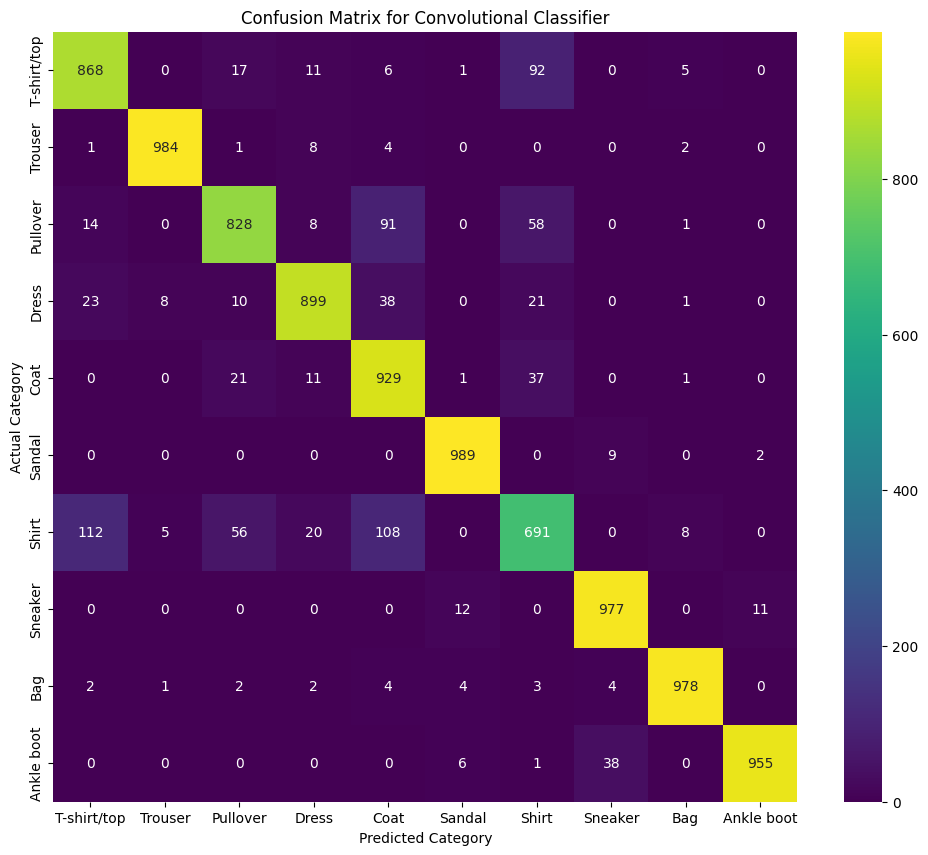

In [ ]:
# Create a Confusion Matrix for the CNN
print("\n--- Analyzing CNN Results ---")


cnn_prediction_probabilities = convolutional_classifier.predict(cnn_testing_input)
cnn_predicted_labels = np.argmax(cnn_prediction_probabilities, axis=1)


confusion_matrix_data = confusion_matrix(raw_testing_labels, cnn_predicted_labels)


plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='viridis', xticklabels=apparel_categories, yticklabels=apparel_categories)
plt.title('Confusion Matrix for Convolutional Classifier')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

Displaying a correctly classified image:


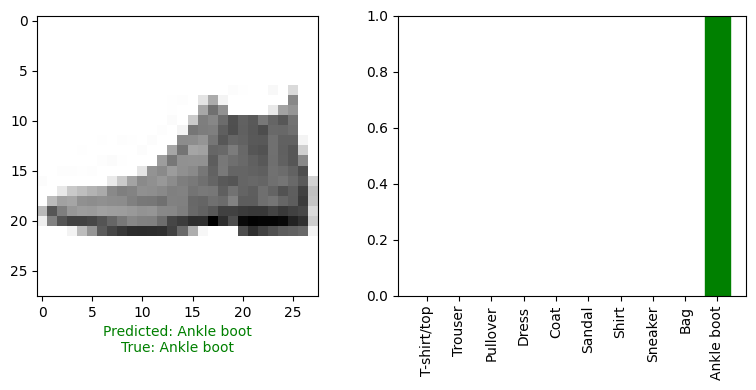


Displaying an incorrectly classified image:


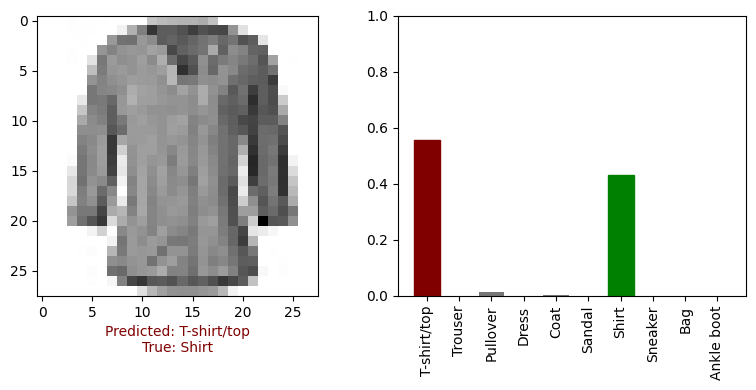

In [ ]:
# Visualize Individual Predictions

def visualize_single_prediction(item_index):
    """
    Plots an image, its predicted label, its true label, and the prediction confidence.
    Uses unique variable names.
    """
    test_image_to_show = raw_testing_images[item_index]
    actual_label = raw_testing_labels[item_index]
    prediction_scores = cnn_prediction_probabilities[item_index]
    predicted_class_index = cnn_predicted_labels[item_index]

    plt.figure(figsize=(8, 4))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(test_image_to_show, cmap=plt.cm.binary)

    # Set the label color
    label_color = 'green' if predicted_class_index == actual_label else 'maroon'
    plt.xlabel(f"Predicted: {apparel_categories[predicted_class_index]}\nTrue: {apparel_categories[actual_label]}", color=label_color)

    # Plot the probabilities bar chart
    plt.subplot(1, 2, 2)
    confidence_bars = plt.bar(range(10), prediction_scores, color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10), apparel_categories, rotation=90)

    # Color the bars
    confidence_bars[predicted_class_index].set_color('maroon')
    confidence_bars[actual_label].set_color('green')

    plt.tight_layout()
    plt.show()

correctly_classified_indices = np.where(cnn_predicted_labels == raw_testing_labels)[0]
incorrectly_classified_indices = np.where(cnn_predicted_labels != raw_testing_labels)[0]

print("Displaying a correctly classified image:")
visualize_single_prediction(correctly_classified_indices[0])

print("\nDisplaying an incorrectly classified image:")
visualize_single_prediction(incorrectly_classified_indices[0])